In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #library to visualize missing data
import re#library for regular expression

from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,RobustScaler,LabelEncoder, OneHotEncoder 
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
#Function to read data to dataframe

def read_file_to_df(filepath):
    
    df = pd.DataFrame()#define an empty dataframe
    
    try:
        if filepath.endswith(".csv"):
            df = pd.read_csv(filepath)
            df_loaded_ind=True

        elif (filepath.endswith(".xls") | filepath.endswith(".xlsx")):
            df = pd.read_excel(filepath)
            df_loaded_ind=True

        else:
            print('Invalid file type')
            print('\n')
            df_loaded_ind = False
    except:
        print('Invalid file path')
        print('\n')
        df_loaded_ind = False
        
                
    return df_loaded_ind,df

In [3]:

while(True):
    filepath             = input('Please provide the file path for the data : ')
    print('\n')
    data_loaded_ind,data = read_file_to_df(filepath)
    if data_loaded_ind:
        print('Data is successfully loaded!!')
        break
    else:
        print('Error loading dataset!! Try again...')
    print('\n')


Please provide the file path for the data : housing_price.csv


Data is successfully loaded!!


In [4]:
input('Press enter to take a quick look at your data\n')
data.head()


Press enter to take a quick look at your data



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
input('Press enter to see the description of your data')
data.describe().T

Press enter to see the description of your data


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
#Function to get the ratio of null values in columns of dataset in descending order
def get_null_count(df):
   
    na_count=df.isnull().sum().sort_values(ascending=False)/len(df)#columnwise ratio of null values
    na_count=na_count[na_count>0]#choose only the columns whic have null values

    return na_count
        

In [7]:
#Function to visualize the null value distribution
def visualize_null_count(df,null_count):

    filtered_data = msno.nullity_filter(df,  filter='bottom',n=len(null_count))
    msno.matrix(filtered_data)
        

Press enter to continue ...


Checking for null values in the dataset...


Below are the features that contain null values :
 PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


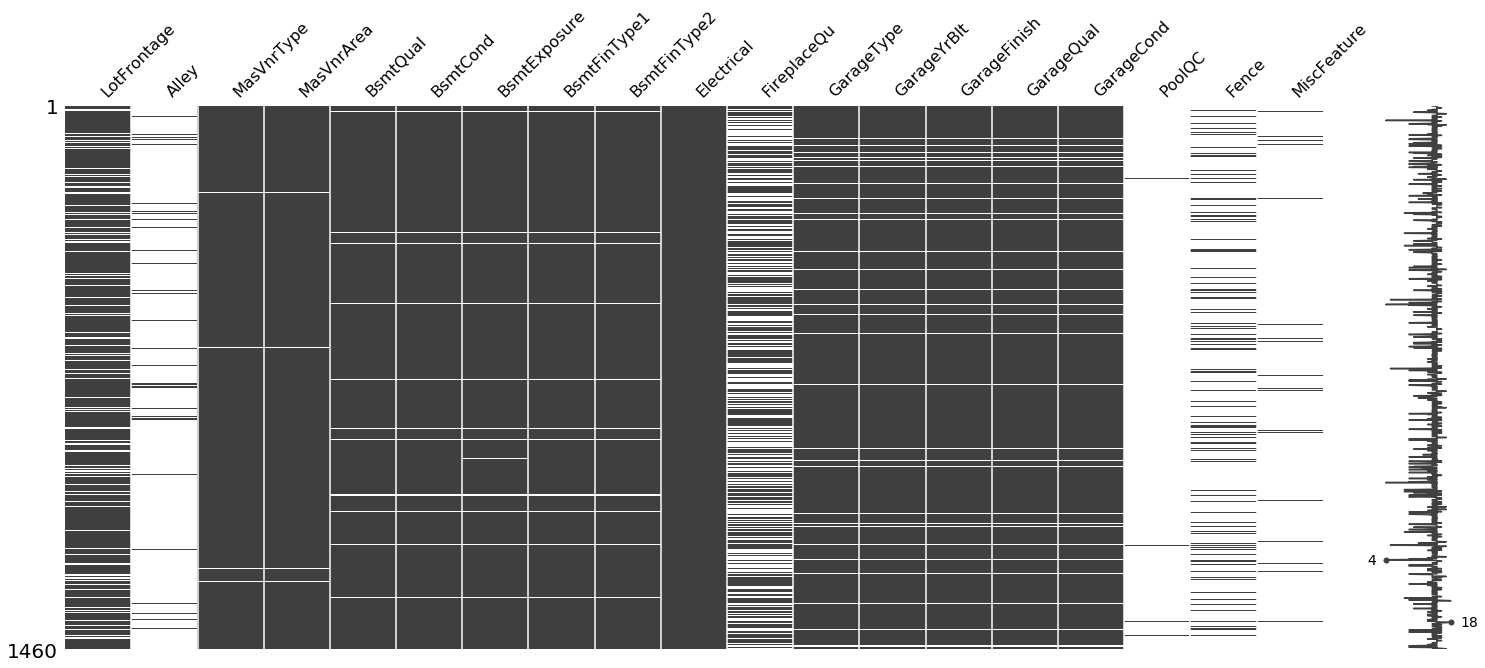

Press enter to continue


''

In [8]:
input('Press enter to continue ...')
print('\n')
print('Checking for null values in the dataset...')
print('\n')
if data.isnull().values.any():
    null_count = get_null_count(data)
    print('Below are the features that contain null values :\n', null_count)
    visualize_null_count(data,null_count)
    plt.show()
else:
    print('There is not any null value in te dataset!!')

input('Press enter to continue')

In [9]:
#Function to drop desired columns
def drop_columns(df,columnlist=[]):
    if columnlist:
        df.drop(columnlist,axis=1,inplace=True)#Drop all the columns in the list
    return df

In [10]:
#Function to validate column names
def validate_columns(df,columnlist):
    
    invalid_columns = []
    if columnlist:
        invalid_columns = [col for col in columnlist if col not in df.columns.tolist()]
                
    return invalid_columns

In [11]:

drop_col_ind = (input('Would you like to drop any feature?-Y/N')).upper()
print('\n')
if drop_col_ind == 'Y':
    while(True):
        drop_null_column_list = []
        print('Enter the features you wish to drop separated by comma :')
        drop_null_column_list = [x for x in input().split(',')]
        print('\n')

        if drop_null_column_list:
            invalid_col_names = validate_columns(data,columnlist = drop_null_column_list)
            if invalid_col_names:
                print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
                print('Please verify..')
                print('\n')
            else:
                break 

    data = drop_columns(data,columnlist=drop_null_column_list)
    print('Specified features are successfully dropped...')
    print('\n')
    print('Existing features in the dataset are: ', data.columns.tolist())
    print('\n')
    input('Press enter to continue')

Would you like to drop any feature?-Y/Nn




In [12]:
#Function to impute missing values
def impute_missing(df, drop_nans):  

    #drop the rows containing null values if drop_nans is set to True
    if drop_nans:
        df.dropna(inplace=True)
    else:
        print("Imputing missing values with mean/mode...")
        print("\n")
        for column in df.columns.values:
        # Replace NaNs with the median or mode of the column depending on the column type
            try:
                column_median = df[column].median()
                df[column].fillna(column_median, inplace=True)

            except TypeError:
                column_mode = df[column].mode()[0]
                df[column].fillna(column_mode, inplace=True)
                
    if df.isnull().values.any():
        print('Error in replacing/dropping missing data')
    else:
        if drop_nans:
            print('Missing values are successfully dropped')   
        else:
            print('Missing values are successfully replaced')
    
    return df
    

In [13]:
if data.isnull().values.any():
    drop_na_rows = (input('Do you wish to drop all rows with null values?-Y/N')).upper()
    print('\n')
    drop_nans = False
    if drop_na_rows == 'Y':
        drop_nans = True

    data = impute_missing(data, drop_nans=drop_nans)
    print('\n')
    input('Press enter to continue')


Do you wish to drop all rows with null values?-Y/Nn


Imputing missing values with mean/mode...


Missing values are successfully replaced


Press enter to continue


In [14]:
print('The data types of every feature are as follows:\n',data.dtypes)


The data types of every feature are as follows:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
G

Plotting the features with integer data types..


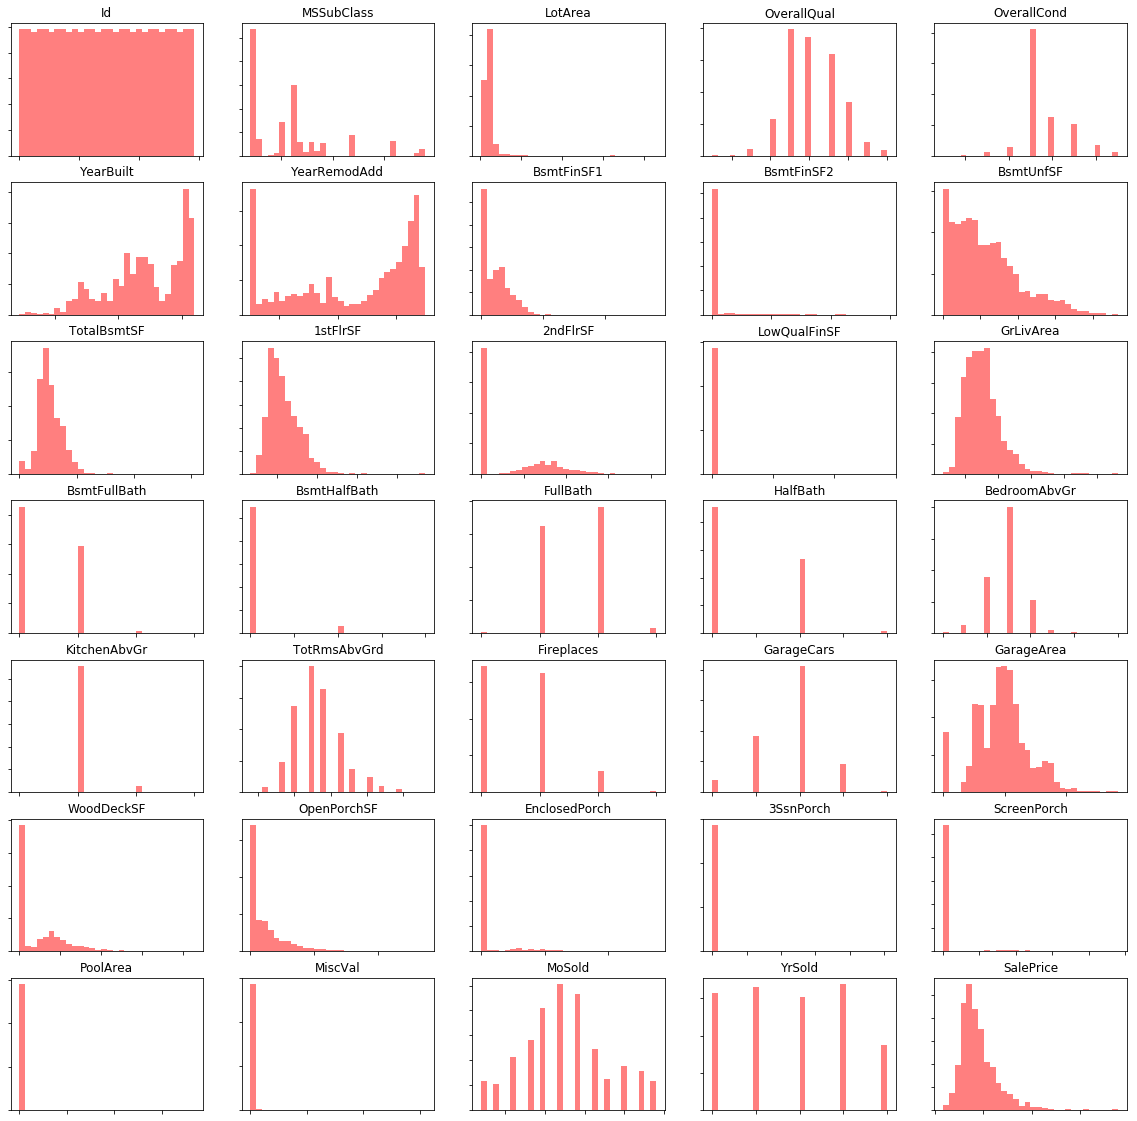

In [15]:
data_int = data.select_dtypes(include=['int64','int32'])
int_columns = data_int.columns
print('Plotting the features with integer data types..')
no_cols = 5
no_rows = int(np.ceil(len(int_columns) / no_cols))
fig, axes = plt.subplots(ncols=no_cols,nrows=no_rows, figsize=(20,20))
axes = axes.flatten()

for i in range(len(int_columns)):#(no_rows*no_cols):
    axes[i].hist(data_int[int_columns[i]], bins=30,facecolor='r',alpha=0.5)
    axes[i].set_title(int_columns[i])
    plt.setp(axes[i].get_xticklabels(), visible=False)
    plt.setp(axes[i].get_yticklabels(), visible=False)


In [16]:
#Function to convert datatype of mentioned columns to corresponding mentioned types
def data_type_converter(df,column_names=[],to_types=[]):
    
    if (isinstance(column_names, list) & isinstance(to_types, list)):#check if passed item is in list format

        for col,typ in zip(column_names,to_types):
            df[col] = df[col].astype(typ) 

    return df

In [17]:

type_change_ind = (input('Would you like to change the data type of any feature?-Y/N')).upper()
print('\n')
if type_change_ind == 'Y':
    while(True):
        cols_for_type_change=[]
        to_type_list=[]
        print('Enter the features for which you wish to change the data types, separated by comma')
        cols_for_type_change = [x for x in input().split(',')]
        print('\n')
        invalid_col_names = validate_columns(data,columnlist = cols_for_type_change)
        if invalid_col_names:
            print('Warning!! Some of the feature names you have entered are incorrect. List of incorrectly entered features are : ',invalid_col_names)
            print('Please verify..')
            print('\n')
        else:
            before_data_type = data[cols_for_type_change].dtypes.tolist()
            break 
    print('Enter the type to which you would like to change the data types')
    to_type_list         = [x for x in input().split(',')]
    print('\n')
    data = data_type_converter(data,column_names=cols_for_type_change,to_types=to_type_list)
    after_data_type = data[cols_for_type_change].dtypes.tolist()
    print('The changed data types are as follows :\n') 
    display(pd.DataFrame(list(zip(cols_for_type_change, before_data_type, after_data_type)),columns=['Features','Before', 'After']))


Would you like to change the data type of any feature?-Y/Nn




In [18]:
#Function to separate data and target variable 
def separate_target(df_raw,target_name):
    
    target             = df_raw[target_name]#target variable 
    df                 = df_raw.drop(target_name,axis=1)#data without target variable
    target_is_separate = True
      
    return df,target,target_is_separate


In [19]:
def separate_cont_and_cat_features(df):
    
    categorical_features = df.select_dtypes(include=['object','bool']).columns.tolist()
    continuous_features  = df.select_dtypes(include=['number']).columns.tolist()
    date_features  = [x for x in df.columns if x not in (categorical_features+continuous_features)]
    
    return continuous_features,categorical_features,date_features
    

In [20]:
#Function to splite timestamp/date column into sub features
def date_splitter(df, fldname):
    
    #convert the specified feature to timestamp format if not already
    fld = df[fldname] 
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld,infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)#substitute the phrase 'date' by spaces in the original field name
    
    #obtain different sub features for the date column
    for n in ('Year', 'Month',  'Day', 'Hour' ,'Minute','Seconds'):
        #if n in ['Hour' ,'Minute','Seconds']:
        df[targ_pre+n] = getattr(fld.dt,n.lower()).apply(lambda x: str(x))
        if n in ['Hour' ,'Minute','Seconds']:
            if any(df[targ_pre+n] > 0):
                df.drop(targ_pre+n,axis=1,inplace=True)
            
        df[targ_pre+n].astype('category')
        #if df

    return df

In [21]:
#Function to convert date field to its Julian format
def Juliandtconv(df,fldname):
    
    #convert the specified feature to timestamp format if not already
    df[fldname]=pd.to_datetime(df[fldname],infer_datetime_format=True)
    
    df[fldname+'Julian'] = df[fldname].apply(lambda x: x.to_julian_date())#convert to julian format
            
    return  df

In [22]:
#Function to concatenate data and target variable 
def concatenate_target(df,target):
    target_is_separate=False
    return (pd.concat([df,target],axis=1)),target_is_separate


In [23]:
target_name    = input('Please enter the target feature :')
while(True):
    invalid_target_name = validate_columns(data,columnlist = [target_name])
    if invalid_target_name:
        target_name = input('Please verify the target feature and re-enter :')
    else:
        break 

Please enter the target feature :SalePrice


In [24]:
data,target,target_is_separate_ind                     = separate_target(data,target_name)
continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)

if date_features:
    print("Transforming date features in the data...")
    print('\n')
    print("The date features in the dataset are : ", date_features)
    print('\n')
    
    for i in date_features:
        print("Please specify whether you would like to split {} or convert it to julian format".format(i))
        split_or_julian_ind=(input("Enter S to split, J to convert to Julian")).upper()
        if split_or_julian_ind == 'S':
            data = date_splitter(data, fldname=i)
        else:
            data = Juliandtconv(data,fldname=i)
            
    date_transformed_data       = drop_columns(data,columnlist=date_features)
    
    data,target_is_separate_ind = concatenate_target(date_transformed_data,target)
    
    print('\n')            
    print('Date tarnsformed data:\n', data.head())
    print('\n')
    input('Press enter to continue')


In [25]:
#Convert categorical features to numerical
def encoding(df,categorical_features):
    
    df_cat = df[categorical_features]
    #By defaault, convert all the categories to numerical forms using Label encoder
    le = {}
    for i in range(len(df_cat.columns.tolist())):
        le[i] = LabelEncoder()
        df_cat.iloc[:,i] = le[i].fit_transform(df_cat.iloc[:,i])

    return df_cat

In [26]:
if target_is_separate_ind:
    data,target_is_separate_ind       = concatenate_target(data,target)
continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)

if categorical_features:
    print('Here is the list of categorical features in the dataset:\n', categorical_features)
    print('\n')
    print('Encoding all categorical featues as numerical...')
    print('\n')
    encoded_data  = encoding(data,categorical_features)
    data          = pd.concat([encoded_data,data[continuous_features+date_features]],axis=1)
    print('Encoded data looks like this: \n',data.head())
    print('\n')
    input('Press enter to continue')

Here is the list of categorical features in the dataset:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Encoding all categorical featues as numerical...




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Encoded data looks like this: 
    MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      0         3            3          0          4   
1         3       1      0         3            3          0          2   
2         3       1      0         0            3          0          4   
3         3       1      0         0            3          0          0   
4         3       1      0         0            3          0          2   

   LandSlope  Neighborhood  Condition1    ...      WoodDeckSF  OpenPorchSF  \
0          0             5           2    ...               0           61   
1          0            24           1    ...             298            0   
2          0             5           2    ...               0           42   
3          0             6           2    ...               0           35   
4          0            15           2    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolAr

In [27]:
#Function to bring all data into same scale
def scale_data(df,scaling_type):  
    
    if scaling_type == 'MinMax':
        scaler = MinMaxScaler()#scales based on minimum and maximum values in dataset
        
    if scaling_type == 'Standardize':
        scaler = StandardScaler()#scales based on mean and standard deviation of dataset setting mean to 0 and standard deviation to 1
        
    if scaling_type == 'Robustscale':
        scaler = RobustScaler()#scales based on interquartile range of data

    return pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [28]:
if not target_is_separate_ind:
    data,target,target_is_separate_ind                     = separate_target(data,target_name)

In [29]:
scaling_method = input('Please choose the scaling method: MinMax/Standardize/Robustscale')
print('\n')

if scaling_method in ['Standardize', 'Robustscale','MinMax']:
    scale      = scaling_method
else:
    print('Invalid scaling method chosen. By default, data is scaled using Min-Max scaler')
    print('\n')
    scale      = 'MinMax'

data,target_is_separate_ind       = concatenate_target(scale_data(data,scaling_type= scale),target)

print('Scaled data:\n',data.head())
print('\n')
input('Press enter to continue')


Please choose the scaling method: MinMax/Standardize/Robustscale


Invalid scaling method chosen. By default, data is scaled using Min-Max scaler


Scaled data:
    MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0      0.75     1.0    0.0       1.0          1.0        0.0        1.0   
1      0.75     1.0    0.0       1.0          1.0        0.0        0.5   
2      0.75     1.0    0.0       0.0          1.0        0.0        1.0   
3      0.75     1.0    0.0       0.0          1.0        0.0        0.0   
4      0.75     1.0    0.0       0.0          1.0        0.0        0.5   

   LandSlope  Neighborhood  Condition1    ...      WoodDeckSF  OpenPorchSF  \
0        0.0      0.208333       0.250    ...        0.000000     0.111517   
1        0.0      1.000000       0.125    ...        0.347725     0.000000   
2        0.0      0.208333       0.250    ...        0.000000     0.076782   
3        0.0      0.250000       0.250    ...        0.000000     0.063985 

''

In [30]:
#Visualize correlation between various features in dataset
def halfHeatMap_corr(df,figsize_x, figsize_y):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    # Drop self-correlations
    #dropSelf = np.zeros_like(corr)
    #dropSelf[np.triu_indices_from(dropSelf)] = True
    # Generate heatmap with mask on redundant values with a precision of 2 
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")#, mask=dropSelf)

    plt.show()

Plotting correlation between the features...




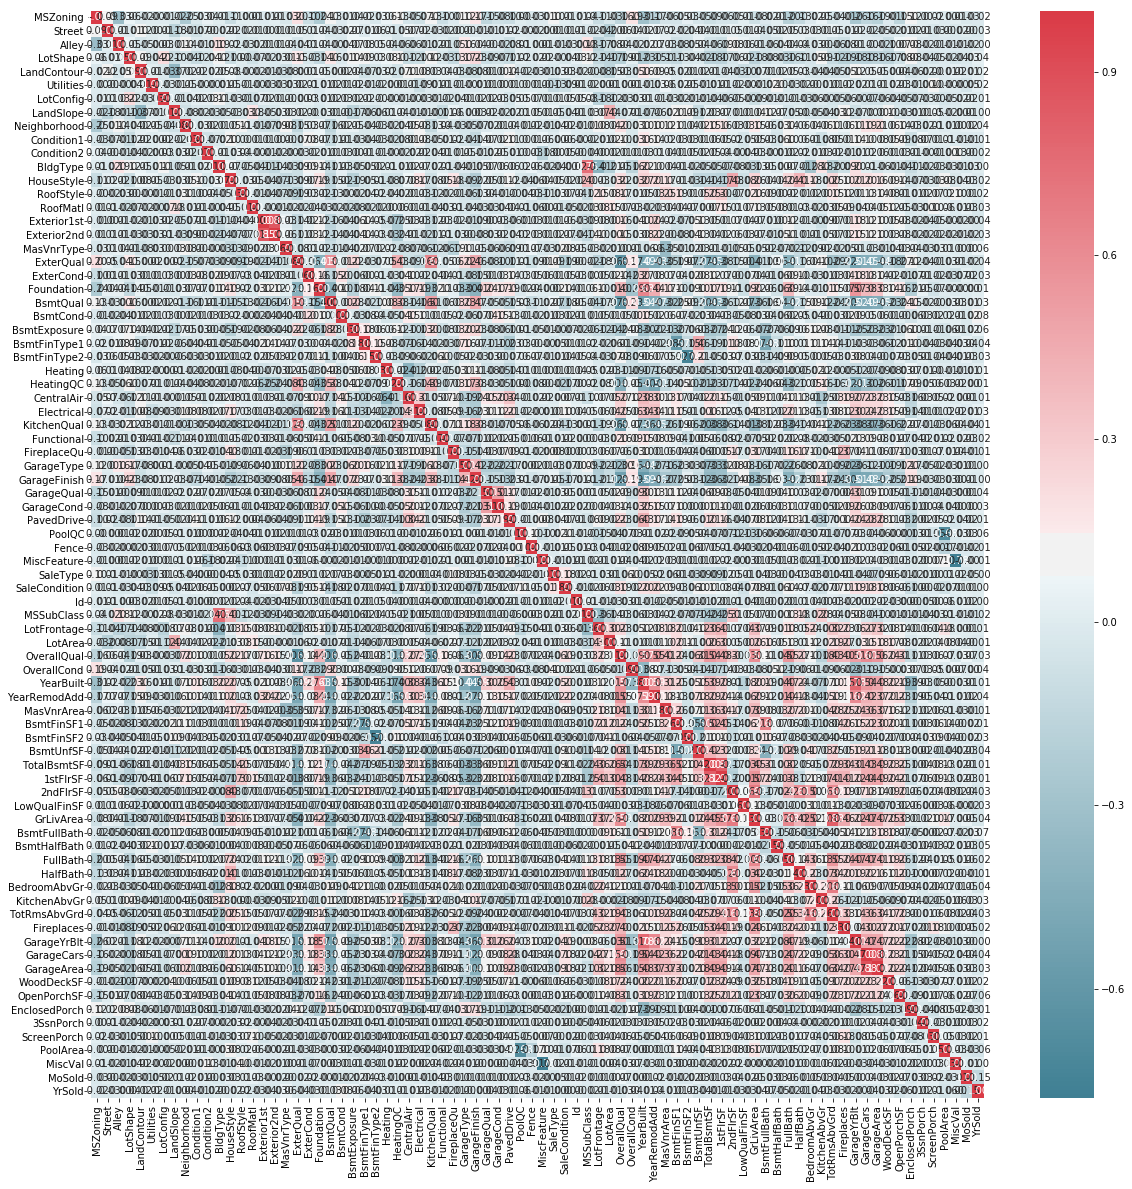

Would you like to increase the plot size for a clear view? - Y/Nn


Press enter to continue...0.85


'0.85'

In [31]:

data,target,target_is_separate_ind                     = separate_target(data,target_name)
    
fig_size_x = 20
fig_size_y = 20

while(True):
    print("Plotting correlation between the features...")
    print('\n')

    halfHeatMap_corr(data,figsize_x=fig_size_x, figsize_y=fig_size_y)

    fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
    print('\n')

    if fig_size_change_ind =='Y':
        fig_size_x += 5
        fig_size_y += 5
    else:
        break

input("Press enter to continue...")

In [32]:
#Function to drop one of the two correlated features, the correlation coeffiecient is higher than the threshold
def drop_highly_corr_features(df,threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    #print(upper)
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    #drop the columns
    df.drop(to_drop,axis =1,inplace=True)
    
    return df,to_drop

In [33]:
drop_corr_ind=(input('Would you like to drop any of the highly correlated features? - Y/N')).upper()
print('\n')
if drop_corr_ind == 'Y':
    corr_threshold_ind = (input("Would you like to specify a threshold of your choice-Y/N?..If not, default threshold value of 0.95 will be assumed.For every pair of correlated features,one of the correlated features above the threshold level will be dropped.")).upper()
    print('\n')
    if corr_threshold_ind == 'Y':
        corr_threshold = float((input("Please refer to the correlation plot and specify a threshold of your choice.")))
        if (corr_threshold > 1 and corr_threshold < 0):
            corr_threshold = 0.95   
    else:
        corr_threshold = 0.95
    print('\n')
    data,dropped_features = drop_highly_corr_features(data,threshold=corr_threshold)
    if dropped_features:
        print("List of features dropped is :", dropped_features)
    else:
        print("None of the features were dropped")
        
print('\n')  
input("Press enter to continue...")
        

Would you like to drop any of the highly correlated features? - Y/Ny


Would you like to specify a threshold of your choice-Y/N?..If not, default threshold value of 0.95 will be assumed.For every pair of correlated features,one of the correlated features above the threshold level will be dropped.y


Please refer to the correlation plot and specify a threshold of your choice.0.85


List of features dropped is : ['Exterior2nd', 'GarageArea']


Press enter to continue...


''

In [34]:
#Function tio obtain a threshold value for outlier removal
def get_outlier_threshold(df):
        
    Q1=df.quantile(0.25)#1st qaurtile 
    Q3=df.quantile(0.75)#3rd qaurtile
    
    IQR=Q3-Q1#Inter quartile range
    #print(Q3+1.5*IQR)
    
    upper_threshold  = (Q3+1.5*IQR).mean()
    lower_threshold  = (Q1-1.5*IQR).mean()
        
    return (upper_threshold,lower_threshold)#return thresholds as a tuple
 

In [35]:
#Function to visualize outliers in the data
def plotoutliers(df,figsize_x=fig_size_x,figsize_y=fig_size_y):
    
    plt.figure(figsize=(figsize_x, figsize_y))#specify the size of the figure
    ax=sns.boxplot(x="variable", y="value", data=pd.melt(df),showmeans=True)#plot outliers
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)#rotate the labels so as to adjust space
    
    threshold = get_outlier_threshold(df)#obtain upper and lower threshold values 
   
    ax.axhline(y=threshold[0], color='r',linestyle='--',label='Upper threshold')#plot upper threshold
    ax.axhline(y=threshold[1], color='b',linestyle='--',label='Lower threshold')#plot lower threshold
    ax.legend(loc='upper right')#set legend

    plt.show()
    
    return threshold
    

In [36]:
#Function to drop rows which contain outliers
def remove_outliers(df,column,threshold,method):
    #Default method is to filter outliers on the basis of interquartile range as we need the data to be normally distributed to filter data based on standard deviation
    
    if method == 'IQR':

        Q1      = df[column].quantile(0.25)#1st qaurtile of the feature
        Q3      = df[column].quantile(0.75)#3rd quartile of the feature
        IQR     = Q3 - Q1#interquartile range

        df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]
    
    if method =='threshold':
        
        df = df[~((df[column] < threshold[1]) |(df[column] > threshold[0]))]#remove data which is more than upper threshold and lesser than lower threshold
        
    if method == 'std':
        
        mean = df[column].mean()#mean of the feature
        std  = df[column].std()#standard deviation of the feature
        
        df = df[df[column] < (3*std + mean)]
        
    return df


Checking if there are outliers in the data.....


Plotting outliers for continuous features...




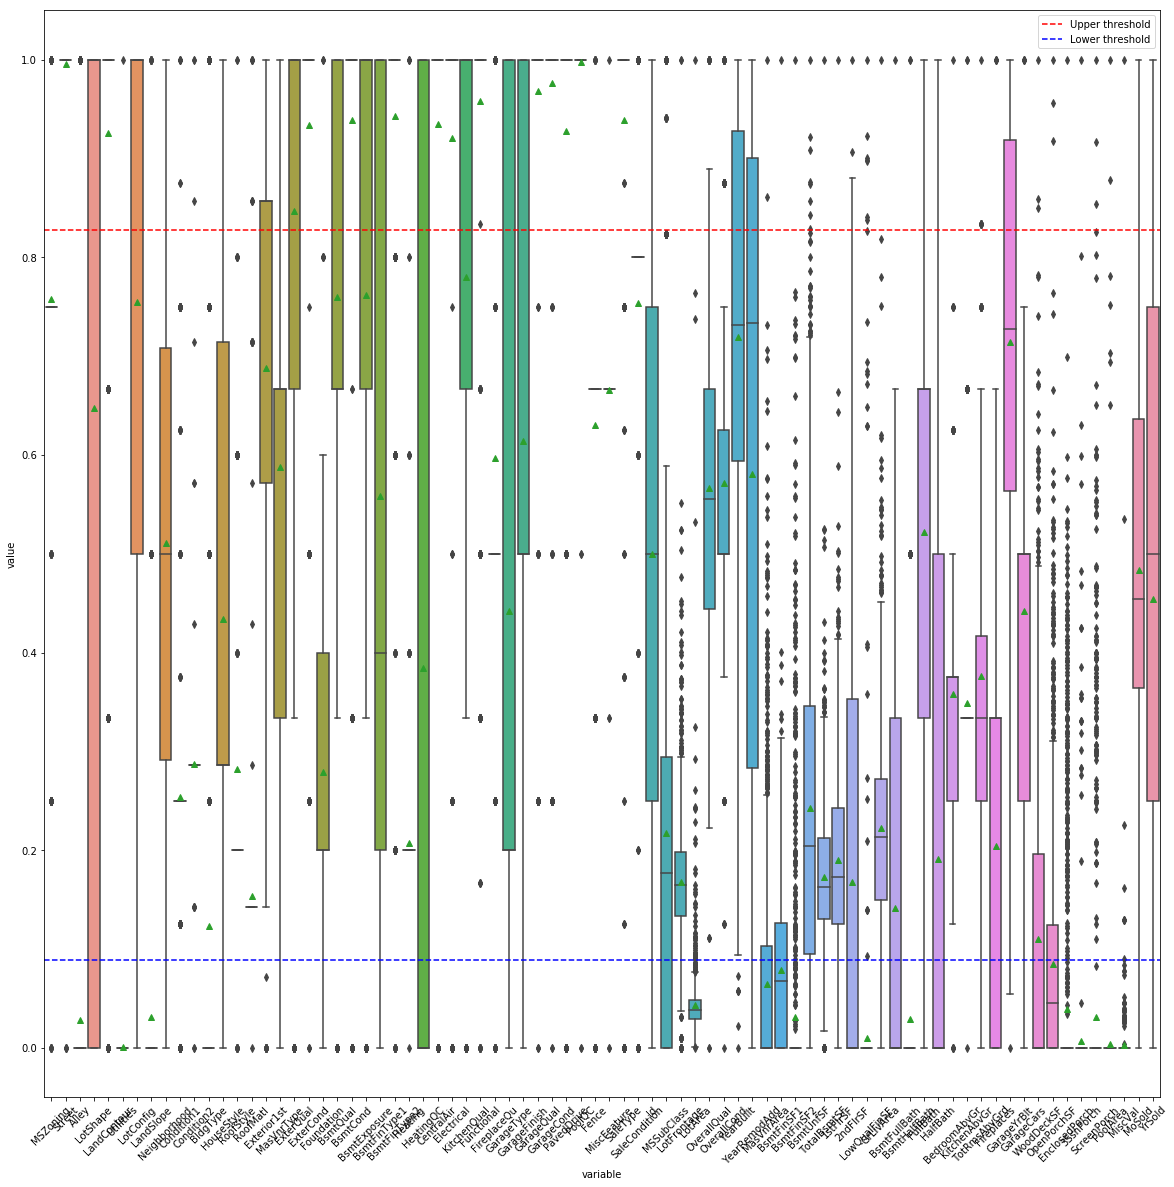

Would you like to increase the plot size for a clear view? - Y/Ny


Plotting outliers for continuous features...




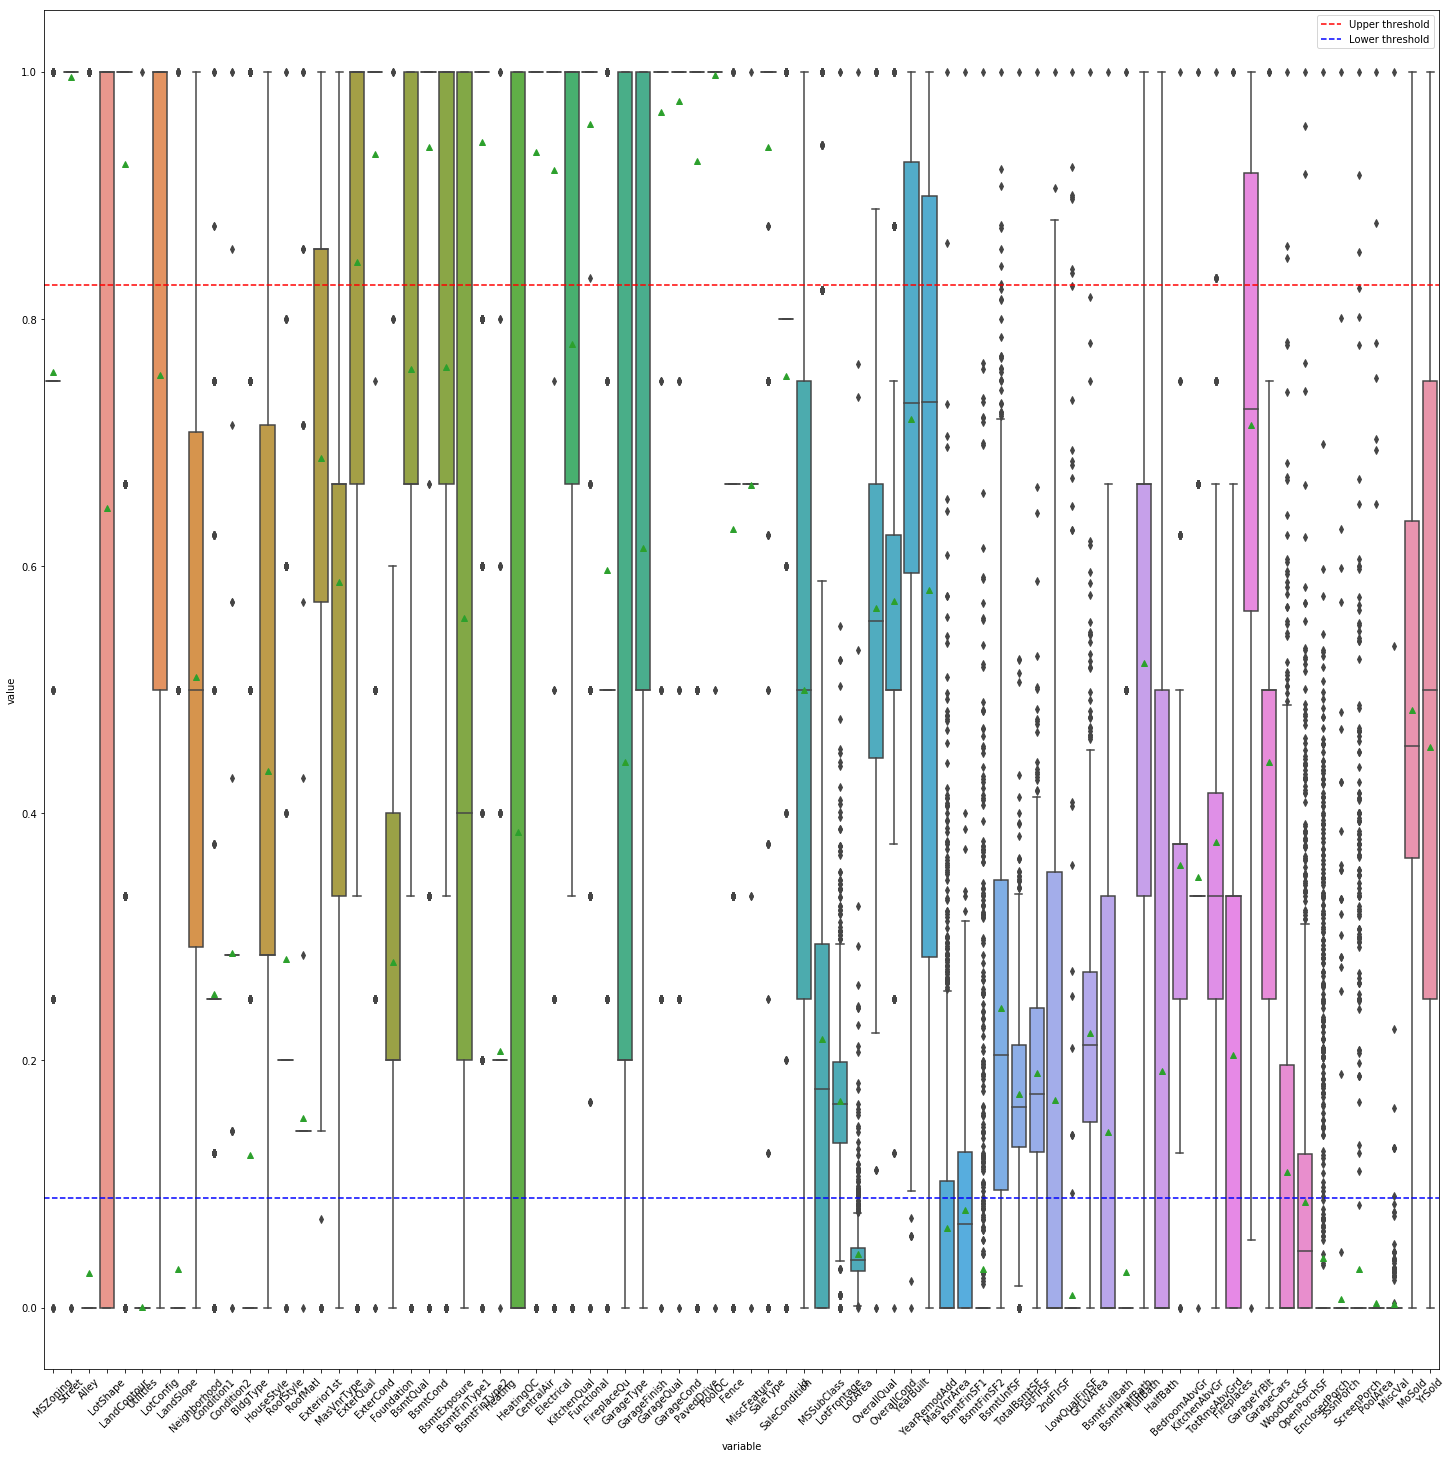

Would you like to increase the plot size for a clear view? - Y/Nn


Plotting outliers for all features...




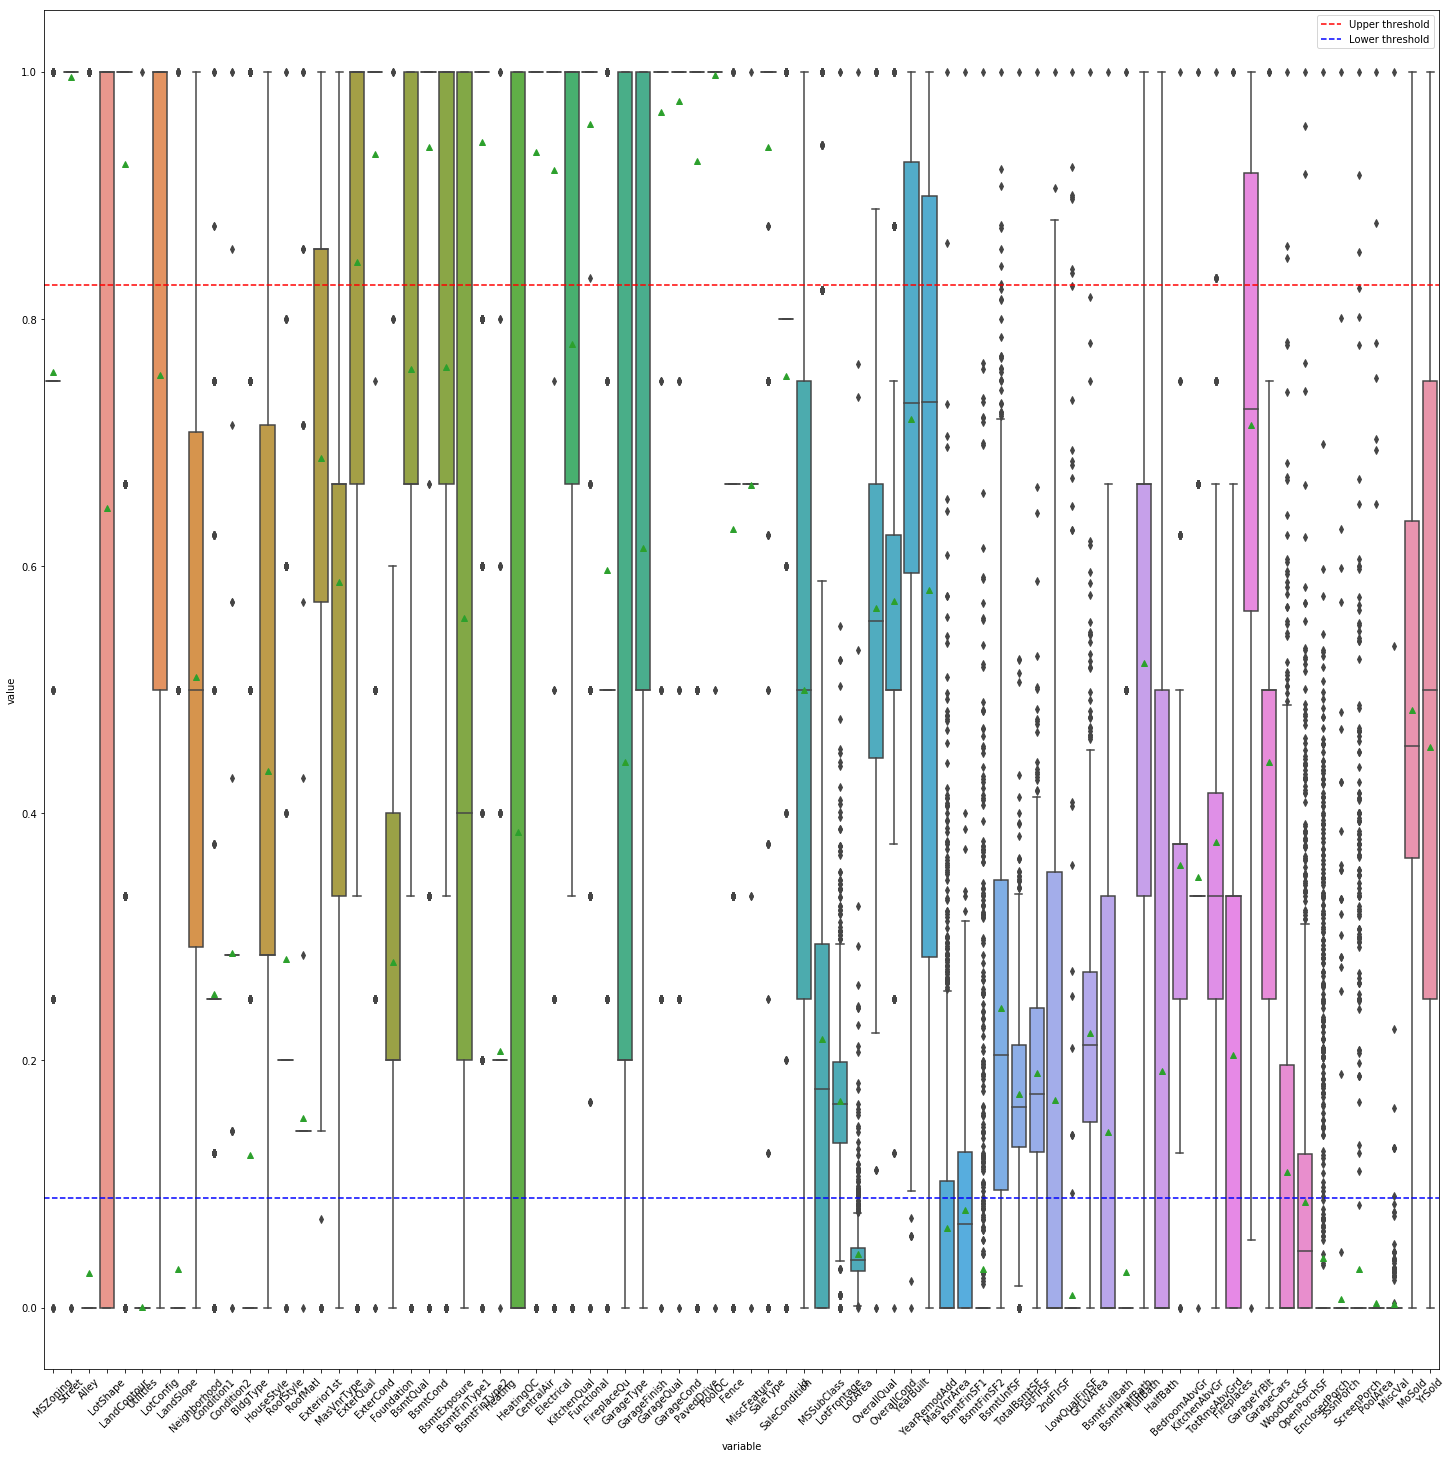

In [ ]:
print("Checking if there are outliers in the data.....")
print('\n')

fig_size_x = 20
fig_size_y = 20

while(True):
    #continuous_features,categorical_features,date_features = separate_cont_and_cat_features(data)
    if target_name in continuous_features:
        out_cont_features = [i for i in continuous_features if i not in dropped_features+ [target_name]]
    else:
        out_cont_features = [i for i in continuous_features if i not in dropped_features]
    
    if target_name in categorical_features:
        out_cat_features = [i for i in categorical_features if i not in dropped_features+ [target_name]]
    else:
        out_cat_features = [i for i in categorical_features if i not in dropped_features]
        
    
    if out_cont_features:
        loop_cont = True
        while(loop_cont==True):
            print("Plotting outliers for continuous features...")
            print('\n')

            #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
            threshold_cont = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)

            fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
            print('\n')

            if fig_size_change_ind =='Y':
                fig_size_x += 5
                fig_size_y += 5  
            else:
                loop_cont = False

    if out_cat_features:
        loop_cat = True
        while(loop_cat == True):
            print("Plotting outliers for categorical features...")
            print('\n')

            #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
            threshold_cat = plotoutliers(data[categorical_features],fig_size_x,fig_size_y)

            fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
            print('\n')

            if fig_size_change_ind =='Y':
                fig_size_x += 5
                fig_size_y += 5  
            else:
                loop_cat = False
                
    loop_all = True  
    while(loop_all == True):
        print("Plotting outliers for all features...")
        print('\n')

        #threshold = plotoutliers(data[out_cont_features],fig_size_x,fig_size_y)
        threshold_all = plotoutliers(data,fig_size_x,fig_size_y)

        fig_size_change_ind = (input('Would you like to increase the plot size for a clear view? - Y/N')).upper()
        print('\n')

        if fig_size_change_ind =='Y':
            fig_size_x += 5
            fig_size_y += 5
        else:
            loop_all = False

    outlier_remove_ind =  (input("Would you like to remove any of the outliers? - Y/N")).upper()
    if outlier_remove_ind == 'Y':
        if target_is_separate_ind:
            data,target_is_separate_ind       = concatenate_target(data,target)
        col = input("Please enter the feature based on which you would like to remove outliers :")
        print("\n")
        invalid_col=False
        while(invalid_col==True):
            col_for_outlier = input("Please enter the feature based on which you would like to remove outliers :")
            print("\n")
            invalid_col_name = validate_columns(data,columnlist = [col_for_outlier])
            if invalid_col_name:
                print('Warning!! Please verify the feature name and re-enter : ',invalid_col_name)
                print('\n')
            else:
                invalid_col=False
        print("Please specify whether you would remove outliers based on Inter quartile range, threshold value or standard deviation")
        removal_method = input("Enter any of these : IQR / threshold / std\n")
        print("\n")
        outlier_thrshld = threshold_all
        if removal_method == 'threshold':
            print("Outliers will be removed based on the displayed threshold of all features unless you would want to change")
            threshld_cat_cont_ind = (input('Would you like to set the threshold based on only continuous or categorical features? - Y/N')).upper()
            if threshld_cat_cont_ind == 'Y':
                cat_or_cont = (input('Enter A/B for threshold based on continuous/categorical features respectively')).upper()
                if cat_or_cont == 'A':
                    outlier_thrshld = threshold_cont       
                elif cat_or_cont =='B':
                    outlier_thrshld = threshold_cat
                else:
                    outlier_threshold_ind = input("Would you like to specify the threshold values for outlier removal? - Y/N")
                    print("\n")
                    if outlier_threshold_ind == 'Y':
                        lower_threshold = input("Enter the lower threshold :")
                        upper_threshold = input("Enter the upper threshold :")
                        print("\n")
                        outlier_thrshld = (lower_threshold,upper_threshold)

        data = remove_outliers(data,column = col,threshold = outlier_thrshld,method = removal_method)
    else:
        break
    
input("Press enter to continue...")

In [ ]:
invalid_col_name

In [ ]:
#Function to plot and obtain feature importance
def feature_imp_plot(df,target,classification,figsize_x=10,figsize_y=20):
    
    #Use random forest with 100 estimators to decide important features
    if classification:
        rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 42)
    else:
        rnd_clf = RandomForestRegressor (n_estimators = 100,random_state = 42)
    
    rnd_clf.fit(df,target)#fit the model
    
    #obtain feature importance along with columns
    x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.columns), reverse = False)))
    
    fi_df=pd.DataFrame(x,index=y,columns=['Importance'])#create dataframe of feature importance
    
    #plot feature importance
    plt.figure(figsize=(figsize_x, figsize_y))
    plt.barh(np.arange(len(y)), x, align='center', alpha=0.5,color='g')
    plt.yticks(np.arange(len(y)), y)
    plt.xlabel('Importance')
    
    return fi_df


In [ ]:
print("Plotting feature importance...")
print('\n')

print("Please specify if this is a regression problem or classification\n")
reg_or_class = (input("Enter R for Regression or C for Classification : ")).upper()

if reg_or_class == 'C':
    class_ind = True
else:
    class_ind = False

if not target_is_separate_ind:
    data,target,target_is_separate_ind                     = separate_target(data,target_name)

data_fi = feature_imp_plot(data,target=target,classification=class_ind)
plt.show()
input("Press enter to continue...")


In [ ]:
#Function to obtain the list of unimportant features by referring to feature importance plot and thereby setting threshold
def get_unimp_features(df,threshold):
    
    unimp_features_list = df[(df['Importance'] < threshold)].index.values.tolist()
    
    return unimp_features_list
    

In [ ]:
drop_features_ind = input('Would you like to drop unimportant features? - Y/N')
print('\n')
if drop_features_ind:
    fi_threshold = float(input('Please refer to the feature importance plot above and enter the threshold below which you would like to drop the features'))
    print('\n')
    unimp_features = get_unimp_features(data_fi,fi_threshold)
    print('Here is the list of unimportant features : ',unimp_features)
    print('\n')
    print('Dropping  all unimportant features ...')
    print('\n')
    data.drop(unimp_features,axis =1,inplace=True)
    print('Now let us take a look at our dataset with important features only!!\n ',data.head())
    
    

In [ ]:
##Function to reduce the number of features in the data
def dimreduction(df,reqd_dim):
    
    components_required=min(reqd_dim,len(df.columns)) #if number of features < 30, then reduce dimension to to number of features else to 30
    pca = PCA(n_components = components_required)
    principalComponents = pca.fit_transform(df.iloc[:,:].values)#converting data to array so as to fit
    principalDf = pd.DataFrame(data = principalComponents)#convert compressed data to dataframe
    
    return principalDf

In [ ]:
dim_red_ind = (input('Would you like to reduce dimensions of the data? - Y/N')).upper
if dim_red_ind:
    no_of_comp = int(input('Please enter the number of dimensions that you would like to reduce to'))
    data = dimreduction(data,reqd_dim = no_of_comp)
    print('Here is your compressed data..\n',data.head())

In [ ]:
data,target_is_separate_ind       = concatenate_target(data,target)